In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
#from sklearn.model_selection import StratifiedKFold
from keras import regularizers
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


<h1>Files for X data</h1>

In [2]:
FILE_PATH = "../assets/"
#this data comes from the splitting of train.csv into 75% training and 25% test
#we must append them in order to get the full prossessed training data set.
with open(FILE_PATH+"dic_process_signa.file", "rb") as f:
    dic_process_signa = pickle.load(f)
with open(FILE_PATH+"dic_process_signa_test.file", "rb") as f:
    dic_process_signa_test = pickle.load(f)

In [3]:
# training flatten
dic_process_signa_reshape={}
i=0
values=dic_process_signa.values()
for row in values:
    row_flatten=[item for sublist in row for item in sublist]
    dic_process_signa_reshape[i]=row_flatten
    i+=1
    
X_train_prossesed=pd.DataFrame.from_dict(dic_process_signa_reshape, orient='index')
X_train_prossesed_scalled=StandardScaler().fit_transform(X_train_prossesed)

#test flatten
dic_process_signa_test_reshape={}
i=0
values=dic_process_signa_test.values()
for row in values:
    row_flatten=[item for sublist in row for item in sublist]
    dic_process_signa_test_reshape[i]=row_flatten
    i+=1
X_test_prossesed=pd.DataFrame.from_dict(dic_process_signa_test_reshape, orient='index')
X_test_prossesed_scalled=StandardScaler().fit_transform(X_test_prossesed)

X_total_prossesed=X_train_prossesed.append(X_test_prossesed)
X_total_prossesed_scalled=StandardScaler().fit_transform(X_total_prossesed)

print("for training use--------------------------->","X_train_prossesed_scalled")
print("for test use------------------------------->","X_test_prossesed_scalled")
print("for total training for challange----------->","X_total_prossesed_scalled")

for training use---------------------------> X_train_prossesed_scalled
for test use-------------------------------> X_test_prossesed_scalled
for total training for challange-----------> X_total_prossesed_scalled


<h1>Let us reconstruct and encode the y data. And load the encoders for later use</h1>

In [5]:
with open(FILE_PATH+"y_train.file", "rb") as f:
    y_train = pickle.load(f)    

with open(FILE_PATH+"y_test.file", "rb") as f:
    y_test = pickle.load(f)
    
y_total=np.concatenate((y_train,y_test), axis=0)

with open(FILE_PATH+"labelenconder.file", "rb") as f:
    labelenconder = pickle.load(f)
with open(FILE_PATH+"one.file", "rb") as f:
    one = pickle.load(f)
    
print("for training use--------------------------->","y_train")
print("for test use------------------------------->","y_test")
print("for total training for challange----------->","y_total")

for training use---------------------------> y_train
for test use-------------------------------> y_test
for total training for challange-----------> y_total


In [101]:
def model_nn_op(alpha,seq):
    Classifier=Sequential()
    Classifier.add(Dense(seq[0], kernel_initializer = 'uniform', activation = 'relu', input_dim = 152,
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(seq[1], kernel_initializer = 'uniform', activation = 'tanh',
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(seq[2], kernel_initializer = 'uniform', activation = 'sigmoid'))
    
    # Compile 
    Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    # fit model
    classifier_NN= Classifier.fit(X_train_prossesed_scalled,y_train,batch_size=10,epochs=150,verbose=0)

    #test on test
    classifier_NN= Classifier.fit(X_train_prossesed_scalled,y_train,batch_size=10,epochs=150,verbose=0)
    y_pred_test=classifier_NN.model.predict(X_test_prossesed_scalled)
    cnf_matrix=confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))
    np.set_printoptions(precision=2)
    
    print("Overall TEST accuracy","nn_11","alpha:",alpha)
    print("----->",accuracy(cnf_matrix))
    print("------------------------------------------------")
    return classifier_NN

In [102]:
alpha=1e-05
sec_3=[60,87,23]
super_nn=model_nn_op(alpha,sec_3)

Overall TEST accuracy nn_11 alpha: 1e-05
-----> 0.9169269206745784
------------------------------------------------


<Figure size 432x288 with 0 Axes>

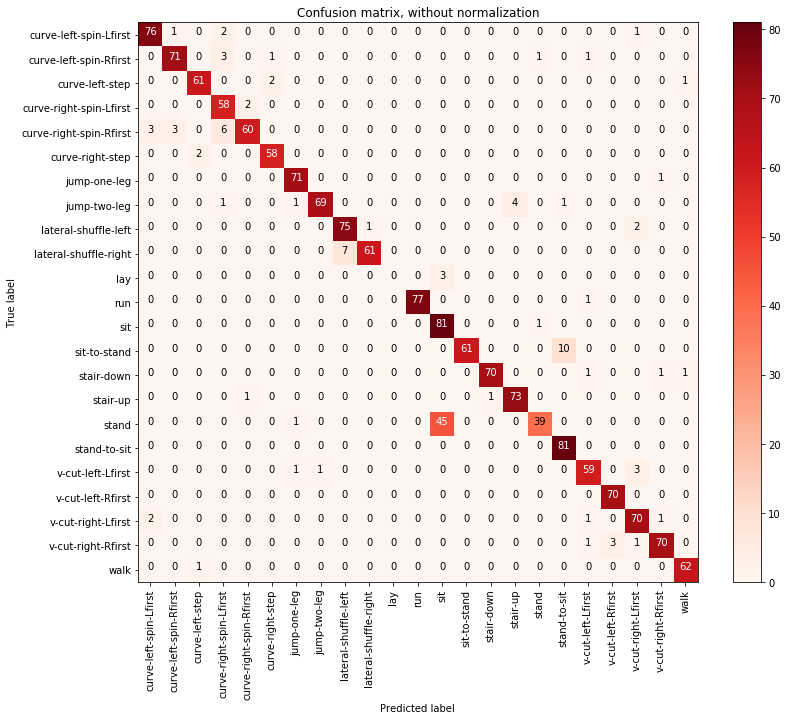

In [119]:


import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#Here create the martrix of prediction over the test sets.
#y_pred_test=tree_model.predict(X_test)

#Here create the martrix of prediction over the train sets.
#y_pred_train=tree_model.predict(X_train)



#Here we give nice format to the Confusion matrix.
#Note, you can use simple confusion_matrix(y_test, y_pred_test)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap='Reds'):

    size = (12, 10)
    fig, ax = plt.subplots(figsize=size)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
#cnf_matrix = confusion_matrix(y_test, y_pred_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=labelenconder.classes_,title='Confusion matrix, without normalization')



<h1>Files for challange data</h1>

In [51]:

with open(FILE_PATH+"dic_process_signa_test_gari.file", "rb") as f:
    dic_process_signa_test_gari = pickle.load(f)
with open(FILE_PATH+"dic_process_signa_test_diogo.file", "rb") as f:
    dic_process_signa_test_diogo = pickle.load(f)
with open(FILE_PATH+"dic_process_signa_challange_ralph.file", "rb") as f:
    dic_process_signa_challange_ralph = pickle.load(f)  

gari=dic_process_signa_test_gari.values()
diogo=dic_process_signa_test_diogo.values()
ralph=dic_process_signa_challange_ralph.values()
data=[gari,diogo,ralph]
i=0
dic_process_challange_reshape={}
for data_Set in data:
    # training flatten
    values=data_Set
    for row in values:
        row_flatten=[item for sublist in row for item in sublist]
        dic_process_challange_reshape[i]=row_flatten
        i+=1

<h1>Prediction for submission</h1>

In [110]:
#X_challange
X_challange=pd.DataFrame.from_dict(dic_process_challange_reshape, orient='index')
X_challange_scalled=StandardScaler().fit_transform(X_challange)

#y_challange, presdiciton for submission
y_challange=labelenconder.inverse_transform(super_nn.model.predict_classes(X_challange_scalled))

ruta="/home/gari/Desktop/Jacobs_resourses/big_data_comp"
df_challenge=pd.read_csv(FILE_PATH+'/challenge.csv')

dicrr={}

Subject_c=list(df_challenge.Subject.values)
dicrr['Subject']=Subject_c

Datafile_c=list(df_challenge.Datafile.values)
dicrr['Datafile']=Datafile_c

dicrr['Label']=y_challange


data_frame_out=pd.DataFrame.from_dict(dicrr)
#data_frame_out.to_csv(index=False,path_or_buf=ruta+'challange_03_24_2.csv')


<h1>Optimization history NN with keras(for reference)</h1>

In [96]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD

#Metrics definition.
def accuracy(confusion_matrix):
    sum_diagonal=sum(np.diagonal(confusion_matrix))
    total=sum(sum(confusion_matrix))
    return (sum_diagonal/total)


def create_nn_0(alpha):
    
    #build network
    Classifier=Sequential()
    Classifier.add(Dense(20, kernel_initializer = 'uniform', activation = 'tanh', input_dim = 152,
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(23, kernel_initializer = 'uniform', activation = 'tanh'))
    
    # Compile
    Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    # fit model
    classifier_NN= Classifier.fit(X_train_prossesed_scalled,y_train,batch_size=10,epochs=50,verbose=0)

    #test on test
    y_pred_test=classifier_NN.model.predict(X_test_prossesed_scalled)
    cnf_matrix=confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))
    np.set_printoptions(precision=2)
    
    print("Overall TEST accuracy","nn_0","alpha:",alpha)
    print("----->",accuracy(cnf_matrix))
    print("------------------------------------------------")
    
    #return classifier_NN.model
def create_nn_01(alpha):
    
    #build network
    Classifier=Sequential()
    Classifier.add(Dense(20, kernel_initializer = 'uniform', activation = 'relu', input_dim = 152,
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(23, kernel_initializer = 'uniform', activation = 'sigmoid'))
    
    # Compile
    Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    # fit model
    classifier_NN= Classifier.fit(X_train_prossesed_scalled,y_train,batch_size=10,epochs=50,verbose=0)

    #test on test
    y_pred_test=classifier_NN.model.predict(X_test_prossesed_scalled)
    cnf_matrix=confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))
    np.set_printoptions(precision=2)
    
    print("Overall TEST accuracy","nn_01","alpha:",alpha)
    print("----->",accuracy(cnf_matrix))
    print("------------------------------------------------")
    
    #return classifier_NN.model
    #return classifier_NN.model
def create_nn_02(alpha):
    
    #build network
    Classifier=Sequential()
    Classifier.add(Dense(30, kernel_initializer = 'uniform', activation = 'tanh', input_dim = 152,
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(23, kernel_initializer = 'uniform', activation = 'sigmoid'))
    
    # Compile
    Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    # fit model
    classifier_NN= Classifier.fit(X_train_prossesed_scalled,y_train,batch_size=10,epochs=50,verbose=0)

    #test on test
    y_pred_test=classifier_NN.model.predict(X_test_prossesed_scalled)
    cnf_matrix=confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))
    np.set_printoptions(precision=2)
    
    print("Overall TEST accuracy","nn_01","alpha:",alpha)
    print("----->",accuracy(cnf_matrix))
    print("------------------------------------------------")
    
    #return classifier_NN.model


def create_nn_1(alpha):
    Classifier=Sequential()
    Classifier.add(Dense(87, kernel_initializer = 'uniform', activation = 'tanh', input_dim = 152,
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(87, kernel_initializer = 'uniform', activation = 'tanh',
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(23, kernel_initializer = 'uniform', activation = 'tanh'))
    
    # Compile 
    Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    # fit model
    classifier_NN= Classifier.fit(X_train_prossesed_scalled,y_train,batch_size=10,epochs=50,verbose=0)

    #test on test
    classifier_NN= Classifier.fit(X_train_prossesed_scalled,y_train,batch_size=10,epochs=50,verbose=0)
    y_pred_test=classifier_NN.model.predict(X_test_prossesed_scalled)
    cnf_matrix=confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))
    np.set_printoptions(precision=2)
    
    print("Overall TEST accuracy","nn_1","alpha:",alpha)
    print("----->",accuracy(cnf_matrix))
    print("------------------------------------------------")
    #return classifier_NN.model
    
    

def create_nn_11(alpha):
    Classifier=Sequential()
    Classifier.add(Dense(87, kernel_initializer = 'uniform', activation = 'relu', input_dim = 152,
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(87, kernel_initializer = 'uniform', activation = 'tanh',
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(23, kernel_initializer = 'uniform', activation = 'sigmoid'))
    
    # Compile 
    Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    # fit model
    classifier_NN= Classifier.fit(X_train_prossesed_scalled,y_train,batch_size=10,epochs=50,verbose=0)

    #test on test
    classifier_NN= Classifier.fit(X_train_prossesed_scalled,y_train,batch_size=10,epochs=50,verbose=0)
    y_pred_test=classifier_NN.model.predict(X_test_prossesed_scalled)
    cnf_matrix=confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))
    np.set_printoptions(precision=2)
    
    print("Overall TEST accuracy","nn_11","alpha:",alpha)
    print("----->",accuracy(cnf_matrix))
    print("------------------------------------------------")
    
def create_nn_12(alpha):
    Classifier=Sequential()
    Classifier.add(Dense(130, kernel_initializer = 'uniform', activation = 'relu', input_dim = 152,
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(87, kernel_initializer = 'uniform', activation = 'relu',
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(23, kernel_initializer = 'uniform', activation = 'sigmoid'))
    
    # Compile 
    Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    # fit model
    classifier_NN= Classifier.fit(X_train_prossesed_scalled,y_train,batch_size=10,epochs=50,verbose=0)

    #test on test
    classifier_NN= Classifier.fit(X_train_prossesed_scalled,y_train,batch_size=10,epochs=50,verbose=0)
    y_pred_test=classifier_NN.model.predict(X_test_prossesed_scalled)
    cnf_matrix=confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))
    np.set_printoptions(precision=2)
    
    print("Overall TEST accuracy","nn_12","alpha:",alpha)
    print("----->",accuracy(cnf_matrix))
    print("------------------------------------------------")   
    
    

def create_nn_2(alpha):
    Classifier=Sequential()
    Classifier.add(Dense(87, kernel_initializer = 'uniform', activation = 'tanh', input_dim = 152,
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(87, kernel_initializer = 'uniform', activation = 'tanh',
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(50, kernel_initializer = 'uniform', activation = 'tanh',
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(30, kernel_initializer = 'uniform', activation = 'tanh',
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(23, kernel_initializer = 'uniform', activation = 'tanh'))
    
    # Compile model
    Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

    #fit
    classifier_NN= Classifier.fit(X_train_prossesed_scalled,y_train,batch_size=10,epochs=50,verbose=0)
    
    #test on test
    y_pred_test=classifier_NN.model.predict(X_test_prossesed_scalled)
    cnf_matrix=confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))
    np.set_printoptions(precision=2)
    
    print("Overall TEST accuracy","nn_2","alpha:",alpha)
    print("----->",accuracy(cnf_matrix))
    print("------------------------------------------------")
    #return classifier_NN.model

def create_nn_3(alpha):
    Classifier=Sequential()
    Classifier.add(Dense(100, kernel_initializer = 'uniform', activation = 'tanh', input_dim = 152,
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(87, kernel_initializer = 'uniform', activation = 'tanh',
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(87, kernel_initializer = 'uniform', activation = 'tanh',
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(87, kernel_initializer = 'uniform', activation = 'tanh',
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(87, kernel_initializer = 'uniform', activation = 'tanh',
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(50, kernel_initializer = 'uniform', activation = 'tanh',
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(50, kernel_initializer = 'uniform', activation = 'tanh',
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(50, kernel_initializer = 'uniform', activation = 'tanh',
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(30, kernel_initializer = 'uniform', activation = 'tanh',
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(30, kernel_initializer = 'uniform', activation = 'tanh',
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(23, kernel_initializer = 'uniform', activation = 'tanh'))
    
    # Compile model
    Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    # fit
    classifier_NN= Classifier.fit(X_train_prossesed_scalled,y_train,batch_size=10,epochs=50,verbose=0)
    
    # test on the test data
    y_pred_test=classifier_NN.model.predict(X_test_prossesed_scalled)
    cnf_matrix=confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))
    np.set_printoptions(precision=2)
    
    print("Overall TEST accuracy","nn_3","alpha:",alpha)
    print("----->",accuracy(cnf_matrix))
    print("------------------------------------------------")
    #return classifier_NN.model


"""
def keras_1(alpha):
    Classifier=Sequential()
    #input node 275 +  1 
    #Classifier.add(Dense(output_dim=22,init='uniform',activation='relu',input_dim=23))
    Classifier.add(Dense(100, kernel_initializer = 'uniform', activation = 'relu', input_dim = 152,
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(87, kernel_initializer = 'uniform', activation = 'relu',
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(23, kernel_initializer = 'uniform', activation = 'sigmoid'))

    Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    #Este el objeto que nos interesa, este el modelo entrenado.
    classifier_NN= Classifier.fit(X_total_prossesed_scalled,y_total,batch_size=10,epochs=50)

"""

"\ndef keras_1(alpha):\n    Classifier=Sequential()\n    #input node 275 +  1 \n    #Classifier.add(Dense(output_dim=22,init='uniform',activation='relu',input_dim=23))\n    Classifier.add(Dense(100, kernel_initializer = 'uniform', activation = 'relu', input_dim = 152,\n                          kernel_regularizer=regularizers.l2(alpha)))\n    Classifier.add(Dense(87, kernel_initializer = 'uniform', activation = 'relu',\n                          kernel_regularizer=regularizers.l2(alpha)))\n    Classifier.add(Dense(23, kernel_initializer = 'uniform', activation = 'sigmoid'))\n\n    Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])\n    #Este el objeto que nos interesa, este el modelo entrenado.\n    classifier_NN= Classifier.fit(X_total_prossesed_scalled,y_total,batch_size=10,epochs=50)\n\n"

In [97]:
alphas=[1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1,1]
for each_alpha in alphas:
    create_nn_0(each_alpha)
    create_nn_01(each_alpha)
    create_nn_02(each_alpha)
    create_nn_1(each_alpha)
    create_nn_11(each_alpha)
    create_nn_12(each_alpha)
    #create_nn_2(each_alpha)
    #create_nn_3(each_alpha)

Overall TEST accuracy nn_0 alpha: 1e-06
-----> 0.8076202373516552
------------------------------------------------
Overall TEST accuracy nn_01 alpha: 1e-06
-----> 0.8625858838226109
------------------------------------------------
Overall TEST accuracy nn_01 alpha: 1e-06
-----> 0.868207370393504
------------------------------------------------
Overall TEST accuracy nn_1 alpha: 1e-06
-----> 0.8888194878201124
------------------------------------------------
Overall TEST accuracy nn_11 alpha: 1e-06
-----> 0.9088069956277327
------------------------------------------------
Overall TEST accuracy nn_12 alpha: 1e-06
-----> 0.915053091817614
------------------------------------------------
Overall TEST accuracy nn_0 alpha: 1e-05
-----> 0.749531542785759
------------------------------------------------
Overall TEST accuracy nn_01 alpha: 1e-05
-----> 0.8663335415365396
------------------------------------------------
Overall TEST accuracy nn_01 alpha: 1e-05
-----> 0.8694565896314803
-----------

KeyboardInterrupt: 

<h1>let ud try with including 42 components pca</h1>

In [83]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.decomposition import PCA

#Metrics definition.
def accuracy(confusion_matrix):
    sum_diagonal=sum(np.diagonal(confusion_matrix))
    total=sum(sum(confusion_matrix))
    return (sum_diagonal/total)

pca = PCA(n_components =42).fit(X_train_prossesed_scalled)
X_train_prossesed_scalled=pca.transform(X_train_prossesed_scalled)

X_test_prossesed_scalled=pca.transform(X_test_prossesed_scalled)

def create_nn_0(alpha):
    
    #build network
    Classifier=Sequential()
    Classifier.add(Dense(20, kernel_initializer = 'uniform', activation = 'tanh', input_dim = 42,
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(23, kernel_initializer = 'uniform', activation = 'tanh'))
    
    # Compile
    Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    # fit model
    classifier_NN= Classifier.fit(X_train_prossesed_scalled,y_train,batch_size=10,epochs=50,verbose=0)

    #test on test
    y_pred_test=classifier_NN.model.predict(X_test_prossesed_scalled)
    cnf_matrix=confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))
    np.set_printoptions(precision=2)
    
    print("Overall TEST accuracy","nn_0","alpha:",alpha)
    print("----->",accuracy(cnf_matrix))
    print("------------------------------------------------")
    
    #return classifier_NN.model



def create_nn_1(alpha):
    Classifier=Sequential()
    Classifier.add(Dense(33, kernel_initializer = 'uniform', activation = 'tanh', input_dim = 42,
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(33, kernel_initializer = 'uniform', activation = 'tanh',
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(23, kernel_initializer = 'uniform', activation = 'tanh'))
    
    # Compile 
    Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    # fit model
    classifier_NN= Classifier.fit(X_train_prossesed_scalled,y_train,batch_size=10,epochs=50,verbose=0)

    #test on test
    classifier_NN= Classifier.fit(X_train_prossesed_scalled,y_train,batch_size=10,epochs=50,verbose=0)
    y_pred_test=classifier_NN.model.predict(X_test_prossesed_scalled)
    cnf_matrix=confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))
    np.set_printoptions(precision=2)
    
    print("Overall TEST accuracy","nn_1","alpha:",alpha)
    print("----->",accuracy(cnf_matrix))
    print("------------------------------------------------")
    #return classifier_NN.model

def create_nn_2(alpha):
    Classifier=Sequential()
    Classifier.add(Dense(33, kernel_initializer = 'uniform', activation = 'tanh', input_dim = 42,
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(33, kernel_initializer = 'uniform', activation = 'tanh',
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(25, kernel_initializer = 'uniform', activation = 'tanh',
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(25, kernel_initializer = 'uniform', activation = 'tanh',
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(23, kernel_initializer = 'uniform', activation = 'tanh'))
    
    # Compile model
    Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

    #fit
    classifier_NN= Classifier.fit(X_train_prossesed_scalled,y_train,batch_size=10,epochs=50,verbose=0)
    
    #test on test
    y_pred_test=classifier_NN.model.predict(X_test_prossesed_scalled)
    cnf_matrix=confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))
    np.set_printoptions(precision=2)
    
    print("Overall TEST accuracy","nn_2","alpha:",alpha)
    print("----->",accuracy(cnf_matrix))
    print("------------------------------------------------")
    #return classifier_NN.model

def create_nn_3(alpha):
    Classifier=Sequential()
    Classifier.add(Dense(40, kernel_initializer = 'uniform', activation = 'tanh', input_dim = 42,
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(33, kernel_initializer = 'uniform', activation = 'tanh',
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(33, kernel_initializer = 'uniform', activation = 'tanh',
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(33, kernel_initializer = 'uniform', activation = 'tanh',
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(33, kernel_initializer = 'uniform', activation = 'tanh',
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(25, kernel_initializer = 'uniform', activation = 'tanh',
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(25, kernel_initializer = 'uniform', activation = 'tanh',
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(23, kernel_initializer = 'uniform', activation = 'tanh'))
    
    # Compile model
    Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    # fit
    classifier_NN= Classifier.fit(X_train_prossesed_scalled,y_train,batch_size=10,epochs=50,verbose=0)
    
    # test on the test data
    y_pred_test=classifier_NN.model.predict(X_test_prossesed_scalled)
    cnf_matrix=confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))
    np.set_printoptions(precision=2)
    
    print("Overall TEST accuracy","nn_3","alpha:",alpha)
    print("----->",accuracy(cnf_matrix))
    print("------------------------------------------------")
    #return classifier_NN.model



In [84]:
alphas=[1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
for each_alpha in alphas:
    create_nn_0(each_alpha)
    create_nn_1(each_alpha)
    create_nn_2(each_alpha)
    create_nn_3(each_alpha)

Overall TEST accuracy nn_0 alpha: 1e-05
-----> 0.7251717676452217
------------------------------------------------
Overall TEST accuracy nn_1 alpha: 1e-05
-----> 0.783260462211118
------------------------------------------------
Overall TEST accuracy nn_2 alpha: 1e-05
-----> 0.3791380387257964
------------------------------------------------
Overall TEST accuracy nn_3 alpha: 1e-05
-----> 0.34291068082448467
------------------------------------------------
Overall TEST accuracy nn_0 alpha: 0.0001
-----> 0.8151155527795128
------------------------------------------------
Overall TEST accuracy nn_1 alpha: 0.0001
-----> 0.7626483447845097
------------------------------------------------
Overall TEST accuracy nn_2 alpha: 0.0001
-----> 0.40537164272329795
------------------------------------------------
Overall TEST accuracy nn_3 alpha: 0.0001
-----> 0.2954403497813866
------------------------------------------------
Overall TEST accuracy nn_0 alpha: 0.001
-----> 0.6189881324172393
---------

In [37]:
#classifier_NN.model.predict_classes(X_test_prossesed_scalled)

In [56]:
#labelenconder
#one
#np.unique(y_pred_test.argmax(axis=1))


In [98]:
def create_nn_op1(alpha,seq):
    Classifier=Sequential()
    Classifier.add(Dense(seq[0], kernel_initializer = 'uniform', activation = 'relu', input_dim = 152,
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(seq[1], kernel_initializer = 'uniform', activation = 'tanh',
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(seq[2], kernel_initializer = 'uniform', activation = 'sigmoid'))
    
    # Compile 
    Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    # fit model
    classifier_NN= Classifier.fit(X_train_prossesed_scalled,y_train,batch_size=10,epochs=150,verbose=0)

    #test on test
    classifier_NN= Classifier.fit(X_train_prossesed_scalled,y_train,batch_size=10,epochs=150,verbose=0)
    y_pred_test=classifier_NN.model.predict(X_test_prossesed_scalled)
    cnf_matrix=confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))
    np.set_printoptions(precision=2)
    
    print("Overall TEST accuracy","nn_11","alpha:",alpha)
    print("----->",accuracy(cnf_matrix))
    print("------------------------------------------------")
    
def create_nn_op2(alpha,seq):
    Classifier=Sequential()
    Classifier.add(Dense(seq[0], kernel_initializer = 'uniform', activation = 'relu', input_dim = 152,
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(seq[1], kernel_initializer = 'uniform', activation = 'relu',
                          kernel_regularizer=regularizers.l2(alpha)))
    Classifier.add(Dense(seq[2], kernel_initializer = 'uniform', activation = 'sigmoid'))
    
    # Compile 
    Classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    # fit model
    classifier_NN= Classifier.fit(X_train_prossesed_scalled,y_train,batch_size=10,epochs=150,verbose=0)

    #test on test
    classifier_NN= Classifier.fit(X_train_prossesed_scalled,y_train,batch_size=10,epochs=150,verbose=0)
    y_pred_test=classifier_NN.model.predict(X_test_prossesed_scalled)
    cnf_matrix=confusion_matrix(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))
    np.set_printoptions(precision=2)
    
    print("Overall TEST accuracy","nn_12","alpha:",alpha)
    print("----->",accuracy(cnf_matrix))
    print("------------------------------------------------")   
    
    

In [99]:
alph=[1e-6,1e-5]
sec_1=[87,87,23]
sec_2=[130,87,23]

sec_3=[60,87,23]
sec_4=[120,87,23]

sec_5=[40,67,23]
sec_6=[100,57,23]

sec_7=[107,107,23]
sec_8=[150,107,23]

sec_7=[127,127,23]
sec_8=[150,127,23]
for each_alpha in alphas:
    print(sec_1,sec_2,"------------")
    create_nn_op1(each_alpha,sec_1)
    create_nn_op2(each_alpha,sec_2)
    print(sec_3,sec_4,"------------")
    create_nn_op1(each_alpha,sec_3)
    create_nn_op2(each_alpha,sec_4)
    print(sec_5,sec_6,"------------")
    create_nn_op1(each_alpha,sec_5)
    create_nn_op2(each_alpha,sec_6)
    print(sec_7,sec_8,"------------")
    create_nn_op1(each_alpha,sec_7)
    create_nn_op2(each_alpha,sec_8)
    #create_nn_2(each_alpha)

[87, 87, 23] [130, 87, 23] ------------
Overall TEST accuracy nn_11 alpha: 1e-06
-----> 0.9106808244846971
------------------------------------------------
Overall TEST accuracy nn_12 alpha: 1e-06
-----> 0.9125546533416614
------------------------------------------------
[60, 87, 23] [120, 87, 23] ------------
Overall TEST accuracy nn_11 alpha: 1e-06
-----> 0.9125546533416614
------------------------------------------------
Overall TEST accuracy nn_12 alpha: 1e-06
-----> 0.9181761399125546
------------------------------------------------
[40, 67, 23] [100, 57, 23] ------------
Overall TEST accuracy nn_11 alpha: 1e-06
-----> 0.9019362898188632
------------------------------------------------
Overall TEST accuracy nn_12 alpha: 1e-06
-----> 0.9256714553404123
------------------------------------------------
[127, 127, 23] [150, 127, 23] ------------
Overall TEST accuracy nn_11 alpha: 1e-06
-----> 0.9300437226733291
------------------------------------------------
Overall TEST accuracy nn_

KeyboardInterrupt: 